In [10]:
from load_data import get_paths, read_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
from sklearn.decomposition import PCA

# Load the data
X,Y = read_data(pad_data=True)
print(f"X data shape: {X.shape}")
print(f"Y data shape: {Y.shape}")

X data shape: (1000, 222, 3)
Y data shape: (1000, 10)


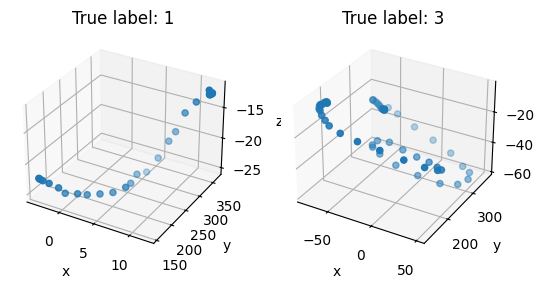

In [11]:
def visualize_data(n_images=2):
    """ Loop all paths, and plot the xyz coordinates in 3d plot"""
    paths = get_paths()
    random.shuffle(paths)
    fig, ax = plt.subplots(1, n_images, subplot_kw=dict(projection='3d'))
    for i,path in enumerate(paths):
        if i >= n_images:
            break
        data = pd.read_csv(path, header=None)
        data = data.to_numpy()
        true_label = path.split("/")[-1].split("_")[1]
        # Plot the data
        ax[i].scatter(data[:,0], data[:,1], data[:,2])
        ax[i].set_title(f"True label: {true_label}")
        ax[i].set_xlabel("x")
        ax[i].set_ylabel("y")
        ax[i].set_zlabel("z")
    plt.show()

visualize_data(2)

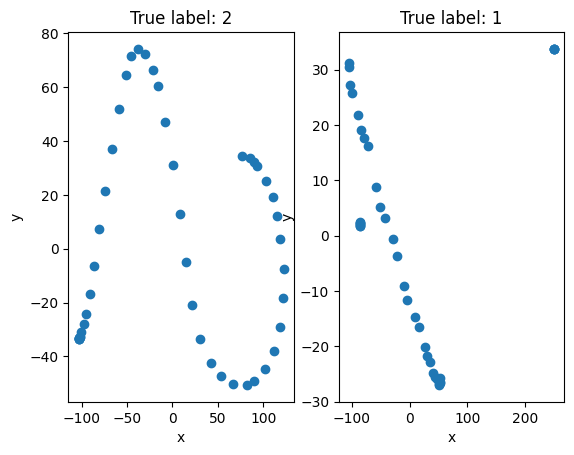

In [9]:
def visualize_data_projected(n_images=2):
    """ Make each sequence to a 3d tensor, and project it to 2d using PCA. Then plot the 2d data.
    """
    paths = get_paths()
    random.shuffle(paths)
    fig, ax = plt.subplots(1, n_images)
    for i, path in enumerate(paths):
        if i >= n_images:
            break
        data = pd.read_csv(path, header=None)
        data = data.to_numpy()
        true_label = path.split("/")[-1].split("_")[1]
        # project each sequence of 3D coordinates to 2D using PCA.
        # Should work well, because numbers/letters only require 2D to be represented.
        pca = PCA(n_components=2)
        pca.fit(data)
        data = pca.transform(data)
        # Plot the data
        ax[i].scatter(data[:,0], data[:,1])
        ax[i].set_title(f"True label: {true_label}")
        ax[i].set_xlabel("x")
        ax[i].set_ylabel("y")
        
    plt.show()
    
visualize_data_projected()